In [1]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn import linear_model # For LASSO Regression 
from sklearn.linear_model import Lasso
from sklearn import metrics # For evaluation
from sklearn.metrics import mean_squared_error # For evaluation
from sklearn.preprocessing import StandardScaler # For scaling/standardizing dataset

from sklearn.model_selection import train_test_split # Dataset Splitting
from sklearn.pipeline import Pipeline # Package to perform instructions 
from sklearn.model_selection import GridSearchCV # CV method

import warnings # Suppress warnings because they are annoying
warnings.filterwarnings('ignore') 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Dataset
CovidM = pd.read_csv("Covid_Master_Data_per million.csv")
print("Rows and columns", CovidM.shape)
CovidM.head()

Rows and columns (92, 22)


,Country.Region,Cases,Deaths,medianHouseholdIncome,medianPerCapitaIncome,pop2020,Pop. Proportion Female,Per Capita Spending on Health,Total Tests,US$ GDP/Capita,...,Median Age,International Inbound Tourists(thousands),Import/Export (% of GDP),R&D Expenditure (% of GDP),smoking prevalence (% of adults),pop2020(in million),deaths per mil,cases per million,tests per million,dpc
0,Luxembourg,3769,89,52493,18418,625.978,49.743255,6236,42643,113196,...,39.729,1046.0,415.4753,1.24366,23.5,0.625978,142.177521,6020.978373,68122.20238,23613.691
1,Singapore,15641,14,32360,7345,5850.342,50.590252,2280,143919,63987,...,42.226,13903.0,326.1947,2.15996,16.5,5.850342,2.393022,2673.518916,24600.10030,895.083
2,Malta,463,4,21141,6869,441.543,49.777058,2304,32989,30650,...,42.596,2274.0,267.7761,0.59697,25.5,0.441543,9.059140,1048.595494,74712.99511,8639.309
3,Ireland,20253,1190,28234,8823,4937.786,50.404460,4757,153954,77771,...,38.246,10338.0,209.8109,1.17681,24.3,4.937786,240.998699,4101.635834,31178.75096,58756.727
4,Slovakia,1391,22,17415,5455,5459.642,51.385777,1108,85922,19547,...,41.249,2162.0,192.3459,0.78965,30.1,5.459642,4.029568,254.778610,15737.66192,15815.960


### Response Variable Distribution

(array([76.,  5.,  2.,  3.,  1.,  2.,  0.,  1.,  1.,  1.]),
 array([  0.        ,  64.72169112, 129.44338224, 194.16507336,
        258.88676448, 323.6084556 , 388.33014672, 453.05183784,
        517.77352896, 582.49522008, 647.2169112 ]),
 <a list of 10 Patch objects>)

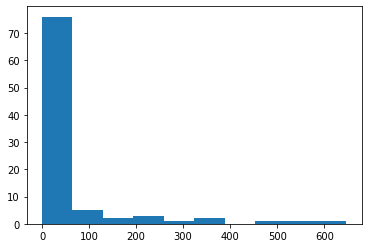

In [3]:
plt.hist(CovidM['deaths per mil'])

#### Log(Response) distribution

(array([13., 10., 20., 11.,  8., 12.,  6.,  2.,  5.,  5.]),
 array([0.        , 0.64742254, 1.29484508, 1.94226761, 2.58969015,
        3.23711269, 3.88453523, 4.53195777, 5.1793803 , 5.82680284,
        6.47422538]),
 <a list of 10 Patch objects>)

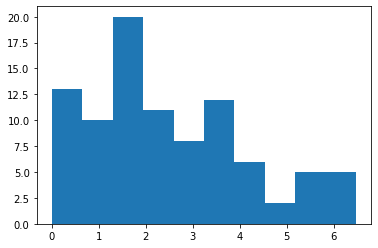

In [4]:
plt.hist(np.log(CovidM['deaths per mil']+1))

In [5]:
CovidM['LogDeaths per mil'] = np.log(CovidM['deaths per mil'] +1 )
CovidM.head()

,Country.Region,Cases,Deaths,medianHouseholdIncome,medianPerCapitaIncome,pop2020,Pop. Proportion Female,Per Capita Spending on Health,Total Tests,US$ GDP/Capita,...,International Inbound Tourists(thousands),Import/Export (% of GDP),R&D Expenditure (% of GDP),smoking prevalence (% of adults),pop2020(in million),deaths per mil,cases per million,tests per million,dpc,LogDeaths per mil
0,Luxembourg,3769,89,52493,18418,625.978,49.743255,6236,42643,113196,...,1046.0,415.4753,1.24366,23.5,0.625978,142.177521,6020.978373,68122.20238,23613.691,4.964085
1,Singapore,15641,14,32360,7345,5850.342,50.590252,2280,143919,63987,...,13903.0,326.1947,2.15996,16.5,5.850342,2.393022,2673.518916,24600.10030,895.083,1.221721
2,Malta,463,4,21141,6869,441.543,49.777058,2304,32989,30650,...,2274.0,267.7761,0.59697,25.5,0.441543,9.059140,1048.595494,74712.99511,8639.309,2.308482
3,Ireland,20253,1190,28234,8823,4937.786,50.404460,4757,153954,77771,...,10338.0,209.8109,1.17681,24.3,4.937786,240.998699,4101.635834,31178.75096,58756.727,5.488932
4,Slovakia,1391,22,17415,5455,5459.642,51.385777,1108,85922,19547,...,2162.0,192.3459,0.78965,30.1,5.459642,4.029568,254.778610,15737.66192,15815.960,1.615334


In [6]:
CovidM.drop(['Cases', 'Deaths','Total Tests','pop2020','dpc','deaths per mil'], axis=1, inplace = True)
CovidM.head()

,Country.Region,medianHouseholdIncome,medianPerCapitaIncome,Pop. Proportion Female,Per Capita Spending on Health,US$ GDP/Capita,% Urban Pop.,People 65 and Over (Millions),Median Age,International Inbound Tourists(thousands),Import/Export (% of GDP),R&D Expenditure (% of GDP),smoking prevalence (% of adults),pop2020(in million),cases per million,tests per million,LogDeaths per mil
0,Luxembourg,52493,18418,49.743255,6236,113196,91.0,0.085700,39.729,1046.0,415.4753,1.24366,23.5,0.625978,6020.978373,68122.20238,4.964085
1,Singapore,32360,7345,50.590252,2280,63987,100.0,0.660004,42.226,13903.0,326.1947,2.15996,16.5,5.850342,2673.518916,24600.10030,1.221721
2,Malta,21141,6869,49.777058,2304,30650,94.6,0.089400,42.596,2274.0,267.7761,0.59697,25.5,0.441543,1048.595494,74712.99511,2.308482
3,Ireland,28234,8823,50.404460,4757,77771,63.2,0.668150,38.246,10338.0,209.8109,1.17681,24.3,4.937786,4101.635834,31178.75096,5.488932
4,Slovakia,17415,5455,51.385777,1108,19547,53.7,0.852265,41.249,2162.0,192.3459,0.78965,30.1,5.459642,254.778610,15737.66192,1.615334


### Correlation Matrix

In [7]:
CovidM.corr()

,medianHouseholdIncome,medianPerCapitaIncome,Pop. Proportion Female,Per Capita Spending on Health,US$ GDP/Capita,% Urban Pop.,People 65 and Over (Millions),Median Age,International Inbound Tourists(thousands),Import/Export (% of GDP),R&D Expenditure (% of GDP),smoking prevalence (% of adults),pop2020(in million),cases per million,tests per million,LogDeaths per mil
medianHouseholdIncome,1.000000,0.956041,-0.179608,0.866716,0.893857,0.633409,-0.021581,0.579745,0.270356,0.308251,0.734456,0.127965,-0.137545,0.601916,0.582109,0.584126
medianPerCapitaIncome,0.956041,1.000000,-0.022103,0.896587,0.873934,0.567135,-0.001697,0.616095,0.301068,0.270022,0.767286,0.149874,-0.122205,0.578826,0.522510,0.649586
Pop. Proportion Female,-0.179608,-0.022103,1.000000,-0.035632,-0.222236,-0.233601,-0.030423,0.183677,0.053528,0.009770,0.082046,0.128262,-0.068415,-0.245264,-0.229889,0.110031
Per Capita Spending on Health,0.866716,0.896587,-0.035632,1.000000,0.902065,0.484651,0.051188,0.487611,0.337819,0.202825,0.726843,0.086773,-0.072255,0.654996,0.467503,0.653236
US$ GDP/Capita,0.893857,0.873934,-0.222236,0.902065,1.000000,0.568867,-0.019855,0.519142,0.225390,0.450035,0.662772,0.119114,-0.119977,0.773517,0.626101,0.601859
% Urban Pop.,0.633409,0.567135,-0.233601,0.484651,0.568867,1.000000,-0.067001,0.487639,0.186400,0.217304,0.425774,0.146174,-0.187417,0.451257,0.455325,0.457301
People 65 and Over (Millions),-0.021581,-0.001697,-0.030423,0.051188,-0.019855,-0.067001,1.000000,0.071460,0.481659,-0.237153,0.201791,0.012825,0.936123,-0.038163,-0.140379,-0.014508
Median Age,0.579745,0.616095,0.183677,0.487611,0.519142,0.487639,0.071460,1.000000,0.361627,0.355670,0.527682,0.584430,-0.082175,0.416345,0.468404,0.623655
International Inbound Tourists(thousands),0.270356,0.301068,0.053528,0.337819,0.225390,0.186400,0.481659,0.361627,1.000000,-0.164179,0.367797,0.227097,0.321306,0.376187,0.046644,0.450026
Import/Export (% of GDP),0.308251,0.270022,0.009770,0.202825,0.450035,0.217304,-0.237153,0.355670,-0.164179,1.000000,0.089902,0.237893,-0.241752,0.432554,0.563120,0.194581


### Linear Regression Analysis Model

In [8]:
# Classify as X & y (Predictors and Response variable)
X = CovidM.copy()
del X['LogDeaths per mil']
del X['Country.Region']
y = CovidM['LogDeaths per mil']

In [9]:
#   ******** Method-1 : linear regression with complete dataset ******** 

# with scaling and testing 
scaler = StandardScaler() # Instantiate
scaler.fit(X) # Fit the data
X_tv = pd.DataFrame(scaler.transform(X)) # Transform the data
X_tv.columns = X.columns.values

# Fit model (remember to add the intercept)
X_tv.index = y.index
X_int = sm.add_constant(X_tv)
fullmodel = sm.OLS(y, X_int).fit()
print(fullmodel.summary())


                            OLS Regression Results                            
Dep. Variable:      LogDeaths per mil   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     24.95
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           2.45e-23
Time:                        19:57:08   Log-Likelihood:                -95.988
No. Observations:                  92   AIC:                             224.0
Df Residuals:                      76   BIC:                             264.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Lasso regression with 5 fold cross validation model

In [10]:
#   ******** Method-2 : lasso regression with 5 fold cross validation ******** alpha selection

# 2. Set up the model pipeline

estimator = Pipeline(steps = [('scale', StandardScaler()), # Scale the data
                     ('lasso', Lasso()) ]) # fit the scaled data using Lasso

# 3. Set up the parameters for each item in pipeline
parameters = {'lasso__alpha': np.linspace(0.001,1.5,100),'lasso__max_iter': range(50,100,50),
              'lasso__tol': [0.0001,0.001, 0.01, 0.1]}

# 4. Instantiate gridsearch cross validation for the model in pipeline
reg2 = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 5, 
                   scoring = 'neg_mean_squared_error', n_jobs = -1) # Instantiate the gridsearch

# 5. fit the model on train data
reg2.fit(X, y)


print('Best hyper parameter set :',reg2.best_params_)   # The best parameter from CV

Best hyper parameter set : {'lasso__alpha': 0.09184848484848486, 'lasso__max_iter': 50, 'lasso__tol': 0.0001}


In [11]:
# 6. Extract the final features, coefficients and their count. 
lasso_method = reg2.best_estimator_.named_steps['lasso'].coef_
lasso = pd.DataFrame(zip(X.columns.values,lasso_method))
lasso.columns = ['Predictor', 'LassoCV5_Coef']

# set index to predictor
lasso.set_index('Predictor',inplace=True)
lasso

,LassoCV5_Coef
Predictor,
medianHouseholdIncome,0.000000
medianPerCapitaIncome,0.198762
Pop. Proportion Female,0.274019
Per Capita Spending on Health,0.000000
US$ GDP/Capita,-0.000000
% Urban Pop.,0.000000
People 65 and Over (Millions),-0.000000
Median Age,0.432064
International Inbound Tourists(thousands),0.000000


In [12]:
# with scaling

X2 = CovidM[['medianPerCapitaIncome','Pop. Proportion Female','Median Age',
             'Import/Export (% of GDP)','cases per million']]
#y = CovidM['deaths per mil']

# Classify as X & y (Predictors and Response variable)

# Create 80% - 20 % split as train-test split of original data
X_tv, X_test, y_tv, y_test = train_test_split(X2,y, test_size = 0.2, random_state = 850)
# with scaling and testing 
scaler = StandardScaler() # Instantiate
scaler.fit(X_tv) # Fit the data
X_tv = pd.DataFrame(scaler.transform(X_tv)) # Transform the data
X_test = pd.DataFrame(scaler.transform(X_test)) # Transform the testing set
X_tv.columns = X2.columns.values
X_test.columns = X2.columns.values

# Fit model (remember to add the intercept)
X_tv.index = y_tv.index
X_int = sm.add_constant(X_tv)
fullmodel = sm.OLS(y_tv, X_int).fit()
print(fullmodel.summary())

# Prediction
X_test_int = sm.add_constant(X_test)
print("MSE on test set",metrics.mean_squared_error(fullmodel.predict(X_test_int), y_test))

                            OLS Regression Results                            
Dep. Variable:      LogDeaths per mil   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     61.10
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           1.27e-23
Time:                        19:57:22   Log-Likelihood:                -78.732
No. Observations:                  73   AIC:                             169.5
Df Residuals:                      67   BIC:                             183.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

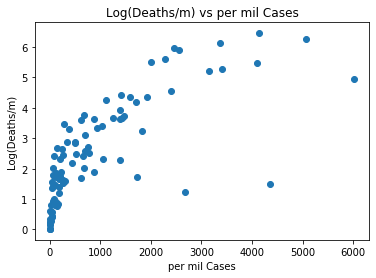

In [13]:
plt.scatter(CovidM['cases per million'], CovidM['LogDeaths per mil'])
plt.xlabel('per mil Cases')
plt.ylabel('Log(Deaths/m)')
plt.title('Log(Deaths/m) vs per mil Cases')
#plt.ylim(0,1200)
plt.show()

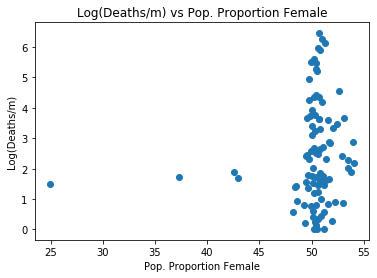

In [14]:
 
plt.scatter(CovidM['Pop. Proportion Female'], CovidM['LogDeaths per mil'])
plt.xlabel('Pop. Proportion Female')
plt.ylabel('Log(Deaths/m)')
plt.title('Log(Deaths/m) vs Pop. Proportion Female')
#plt.ylim(0,1200)
plt.show()

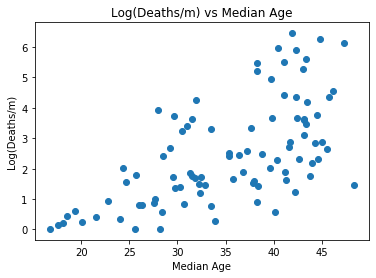

In [15]:
plt.scatter(CovidM['Median Age'], CovidM['LogDeaths per mil'])
plt.xlabel('Median Age')
plt.ylabel('Log(Deaths/m)')
plt.title('Log(Deaths/m) vs Median Age')
#plt.ylim(0,1200)
plt.show()

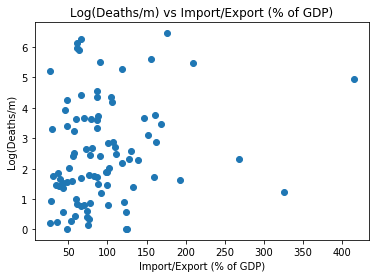

In [16]:
plt.scatter(CovidM['Import/Export (% of GDP)'], CovidM['LogDeaths per mil'])
plt.xlabel('Import/Export (% of GDP)')
plt.ylabel('Log(Deaths/m)')
plt.title('Log(Deaths/m) vs Import/Export (% of GDP)')
#plt.ylim(0,1200)
plt.show()

In [17]:
# Pop. Proportion Female
(np.exp(0.4810)-1)*100

61.76912849017005

In [18]:
#Median Age 

(np.exp(0.4681)-1)*100

59.69570904115744

In [19]:
#Import/Export (% of GDP) 

(np.exp(-0.3756)-1)*100

-31.31229710889709

In [20]:
# cases per million
(np.exp(1.2358)-1)*100

244.11303240962826